# A2: Q4 and Q5

In [34]:
import numpy as np
from scipy.sparse import dok_matrix
from copy import deepcopy
import matplotlib.pyplot as plt

# A2Q4a: `SparseMatMult`

In [56]:
def SparseMatMult(G, x):
    '''
      y = SparseMatMult(G, x)
      
      Multiplies a vector (x) by a sparse matrix G,
      such that y = G @ x .
      
      Inputs:
        G is an NxM dictionary-of-keys (dok) sparse matrix
        x is an M-vector
      
      Output:
        y is an N-vector
    '''
    rows,cols = G.nonzero()
    Nrows,Ncols = np.shape(G)
    y = np.zeros(Nrows)
    
    for r,c in zip(rows, cols):
        y[r] += G[r,c]*x[c]
    return y

In [57]:
# Simple test
#     [1  0  0]      [ 0.1 ]
# A = [0  0 -1]  b = [ 0.2 ]
#     [0  2  0]      [ 0.3 ]
A = dok_matrix((3,3), dtype=np.float32)
A[0,0] = 1.
A[1,2] = -1.
A[2,1] = 2.
b = np.array([0.1, 0.2, 0.3])
y = SparseMatMult(A, b)
print(f'y = {y}')
print(f'Answer should be [ 0.1 -0.3  0.4]')

y = [ 0.1 -0.3  0.4]
Answer should be [ 0.1 -0.3  0.4]


# A2Q4b: `PageRank`

In [83]:
def PageRank(G, alpha):
    '''
     p, iters = PageRank(G, alpha)

     Computes the Google Page-rank for the network in the adjacency matrix G.
     
     Note: This function never forms a full RxR matrix, where R is the number
           of node in the network.

     Input
       G     is an RxR adjacency matrix, G[i,j] = 1 iff node j projects to node i
             Note: G must be a dictionary-of-keys (dok) sparse matrix
       alpha is a scalar between 0 and 1

     Output
       p     is a probability vector containing the Page-rank of each node
       iters is the number of iterations used to achieve a change tolerance
             of 1e-8 (changes to elements of p are all smaller than 1e-8)
    '''
    R = np.shape(G)[0]
    rows,cols = G.nonzero()
    iters = 0

    sums_column = np.zeros(R)
    P0 = deepcopy(G)
    
    for r,c in zip(rows, cols):
        sums_column[c] += G[r,c]

    for r,c in zip(rows, cols):
        P0 /= sums_column[c]
        
    d = np.array([(1 if c==0 else 0) for c in sums_column])
    e = np.ones(R, dtype=float)
    p = np.ones(R, dtype=float)
    
    iter_count = 100000
    err = 1
    
    while iters<iter_count and err>1e-8:
        M = alpha*(SparseMatMult(P0, p) + e*(d@p)/R) + (1-alpha)/R*e
        err = np.linalg.norm(p-M, np.inf)
        p=M
        iters+=1
        if iters==iter_count:
            disp('error detected')
        
    return p, iters

# A2Q5: Illegal Trading Network

## (a) Create sparse matrix

In [84]:
# === YOUR CODE HERE ===
G = dok_matrix((12,12), dtype=float)
#A:0
#B:1
#C:2
#D:3
#E:4
#F:5
#G:6
#H:7
#I:8
#J:9
#K:10
#l:11
G[1,0] = 38
G[2,0] = 38
G[4,0] = 24
G[0,1] = 6
G[2,1] = 41
G[5,1] = 53
G[0,2] = 47
G[1,2] = 29
G[3,2] = 24
G[2,3] = 8
G[4,3] = 42
G[5,3] = 50
G[0,4] = 9
G[3,4] = 4
G[5,4] = 9
G[6,4] = 39
G[11,4] = 39
G[1,5] = 9
G[3,5] = 28
G[4,5] = 19
G[7,5] = 22
G[11,5] = 22
G[4,6] = 13
G[7,6] = 17
G[8,6] = 23
G[9,6] = 27
G[11,6] = 20
G[5,7] = 15
G[6,7] = 21
G[8,7] = 21
G[9,7] = 10
G[10,7] = 18
G[11,7] = 15
G[6,8] = 24
G[7,8] = 24
G[9,8] = 32
G[10,8] = 20
G[6,9] = 30
G[7,9] = 40
G[8,9] = 5
G[10,9] = 25
G[7,10] = 33
G[8,10] = 7
G[9,10] = 60
G[4,11] = 6
G[5,11] = 18
G[6,11] = 47
G[7,11] = 29


## (b) Run PageRank on network

In [85]:
# === YOUR CODE HERE ===
p,iters = PageRank(G, float(1))

## (c) Note to police

DOUBLE-CLICK TO PLACE YOUR COMMENTS HERE


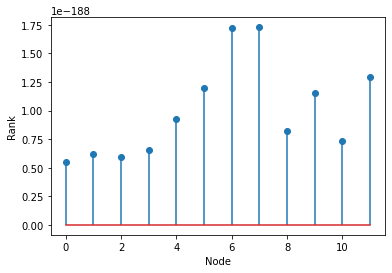

In [86]:
plt.stem(p)
plt.xlabel('Node')
plt.ylabel('Rank');